In [1]:
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

from ml4comm.qam_awgn import generate_symbols
from ml4comm.qam_analyzer import plot_decision_boundary, ser, plot_confusion_matrix
from ml4comm.plot import plot_symbols
from ml4comm.symbols import setup_channel, generate_dataset

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [46]:
channel_type = 'awgn' # 'awgn' or 'crazy'
M            = 16      # QAM modulation
crazy_train_size = 600
awgn_train_size = 450
num_symbols  = 3000 + (awgn_train_size if channel_type == 'awgn' else crazy_train_size)    # Number of transmitted symbols
SNR_dB       = 15      # Signal to noise ratio in dB     
code_rate    = 1       # Rate of the used code
Es           = 1       # Average symbol energy

NUM_THREADS=-1 # use all available threads
MAX_ERROR_RATE = 0.03 if channel_type == 'awgn' else 0.02 # Max error rate: 3%

# Model Parameters
KNN_NUM_NEIGHBORS = 11 # Number of neighbors to use
KNN_ALGORITHM = 'kd_tree' # Better than brute force for low dimensional data
KNN_WEIGHT = 'distance' # Weight points by the inverse of their distance


In [44]:
def classification_workflow(model):
  symbs, indexes = generate_symbols(num_symbols, M) # Generate the QAM symbols
  channel_output = setup_channel(channel_type,symbs,code_rate,Es,SNR_dB)
  [X_train, X_test, y_train, y_test] = generate_dataset(channel_output,indexes)
  clf = model.fit(X_train, y_train) 
  return ser(clf, X_test, y_test)

def print_accuracy(ser_array: np.ndarray, threshold: float):
  arr = np.where(ser_array <= threshold, 1, 0)
  output = np.sum(arr)/ser_array.size

  print('-----Resumo-----')
  for index in range(0, ser_array.size):
    print(f'Rodada {index+1} | {ser_array[index]:.2%}')

  print(f'\nResultados dentro do limite de {MAX_ERROR_RATE:.2%}: {output:.2%} ou {int(output/0.03030303)}/{ser_array.size}.')

In [41]:
symbs, indexes = generate_symbols(num_symbols, M) # Generate the QAM symbols
channel_output = setup_channel(channel_type,symbs,code_rate,Es,SNR_dB)
[X_train, X_test, y_train, y_test] = generate_dataset(channel_output,indexes)

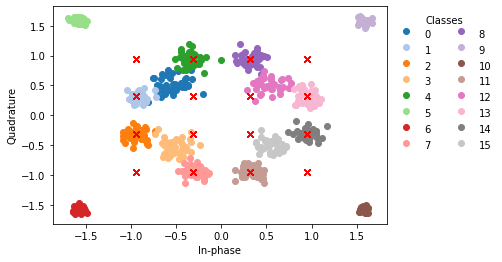

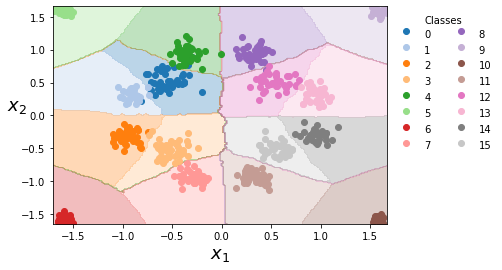

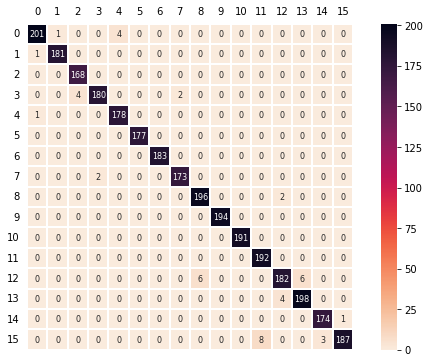

In [43]:
clf_KNN = KNeighborsClassifier(n_neighbors=KNN_NUM_NEIGHBORS,algorithm=KNN_ALGORITHM,weights=KNN_WEIGHT,n_jobs=NUM_THREADS).fit(X_train, y_train)
plot_symbols(X_train, y_train, symbs, QAM_modulation=M)
plot_decision_boundary(clf_KNN, X_train, y_train, legend=True)
plot_confusion_matrix(clf_KNN, X_test, y_test, M)


## Classifier

### K-nearest neighbors

In [47]:
clf_KNN = KNeighborsClassifier(n_neighbors=KNN_NUM_NEIGHBORS,algorithm=KNN_ALGORITHM,weights=KNN_WEIGHT,n_jobs=NUM_THREADS)
sers = [classification_workflow(clf_KNN) for x in range(33)]
sers = np.array(sers)
print_accuracy(sers, MAX_ERROR_RATE)
# plot_decision_boundary(clf_KNN, X_train, y_train, legend=True)
# plot_confusion_matrix(clf_KNN, X_test, y_test, M)

-----Resumo-----
Rodada 1 | 2.03%
Rodada 2 | 2.13%
Rodada 3 | 2.07%
Rodada 4 | 2.53%
Rodada 5 | 1.93%
Rodada 6 | 2.43%
Rodada 7 | 2.03%
Rodada 8 | 2.40%
Rodada 9 | 2.50%
Rodada 10 | 2.40%
Rodada 11 | 2.03%
Rodada 12 | 2.17%
Rodada 13 | 2.17%
Rodada 14 | 2.63%
Rodada 15 | 2.10%
Rodada 16 | 2.47%
Rodada 17 | 2.37%
Rodada 18 | 1.87%
Rodada 19 | 2.20%
Rodada 20 | 2.07%
Rodada 21 | 2.37%
Rodada 22 | 2.13%
Rodada 23 | 2.53%
Rodada 24 | 2.07%
Rodada 25 | 2.43%
Rodada 26 | 2.47%
Rodada 27 | 2.10%
Rodada 28 | 2.00%
Rodada 29 | 2.10%
Rodada 30 | 2.13%
Rodada 31 | 1.80%
Rodada 32 | 2.33%
Rodada 33 | 2.30%

Resultados dentro do limite de 3.00%: 100.00% ou 33/33.
